In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [101]:
bird_data = pd.read_csv('data/2016_CBCM_birds_willowbrook.csv', parse_dates = [2])
bird_data.describe()

,Chart Number,Bird Species,Admission Date,When Captured,Age,Sex,Address - Captured,City - Captured,Injury Cause,Status
count,2831,2831,2831,2831,2831,2831,2659,2817,2829,2831
unique,2831,143,294,2064,7,3,2122,153,25,13
top,2016-09404,Mallard,2016-09-29 00:00:00,10/19/16,A,UNK,PO Box 7178,Chicago,Collision - building,Released
freq,1,198,126,39,1346,2206,49,2291,1777,1893
first,NaN,NaN,2016-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2016-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


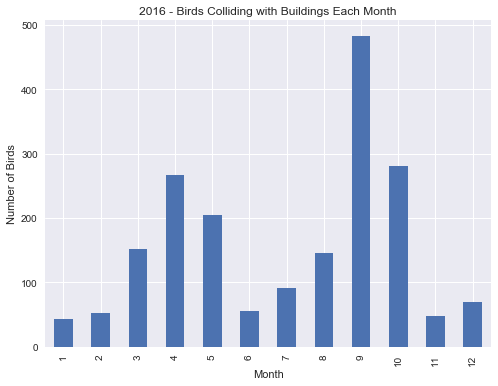

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))
collision_values = ["Collision - building", "Collision - window", "Collision - car", "Collision - other"]
row_mask = bird_data.isin(collision_values)["Injury Cause"]
collision_data = bird_data[row_mask]
collision_data['Chart Number'].groupby(collision_data["Admission Date"].dt.month).count().plot(kind="bar")

ax.set_xlabel('Month')
ax.set_ylabel('Number of Birds')
plt.title('2016 - Birds Colliding with Buildings Each Month')
plt.show()

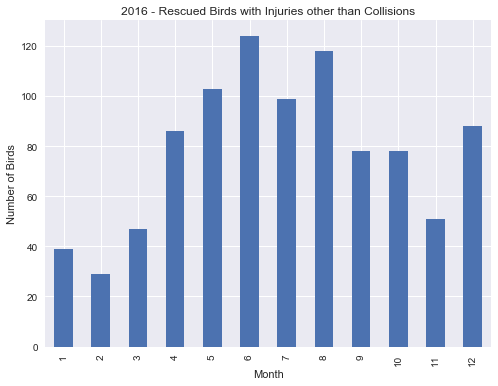

In [28]:
fig, ax = plt.subplots(figsize=(8, 6))
collision_values = ["Collision - building", "Collision - window", "Collision - car", "Collision - other"]
row_mask = bird_data.isin(collision_values)["Injury Cause"]
non_collision_data = bird_data[~row_mask]
# months
non_collision_data['Chart Number'].groupby(non_collision_data["Admission Date"].dt.month).count().plot(kind="bar")

ax.set_xlabel('Month')
ax.set_ylabel('Number of Birds')
plt.title('2016 - Rescued Birds with Injuries other than Collisions')
plt.show()

In [29]:
bird_data["Injury Cause"].unique()

array(['Gunshot', 'Unknown', 'Collision - window', 'Collision - building',
       'Animal attack - cat', 'Collision - car', 'Animal attack - other',
       'Collision - other', 'Shot - arrow', 'Fell from nest',
       'Entanglement - string', 'Trap - other', 'Entanglement- other',
       'Entanglement - fence', 'Orphaned', 'Human Interference',
       'ComEd - power related', 'Entanglement - fishing line',
       'Entanglement - wire', 'Lawn mower', 'Weather related', nan,
       'Entanglement - glue', 'Trap - live', 'Electrocuted',
       'Entanglement - soccer net'], dtype=object)

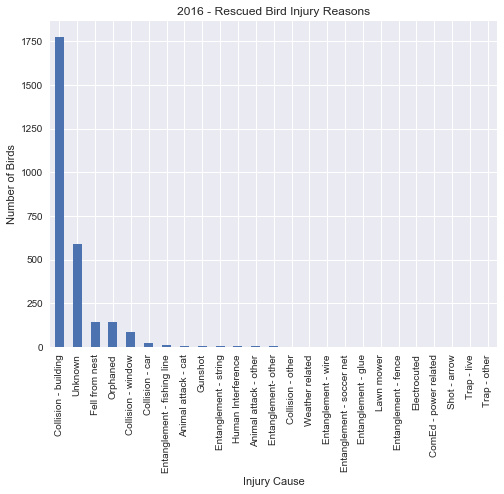

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))
bird_data['Chart Number'].groupby(bird_data["Injury Cause"]).count().sort_values(ascending= False).plot(kind="bar")

ax.set_xlabel('Injury Cause')
ax.set_ylabel('Number of Birds')
plt.title('2016 - Rescued Bird Injury Reasons')
plt.show()

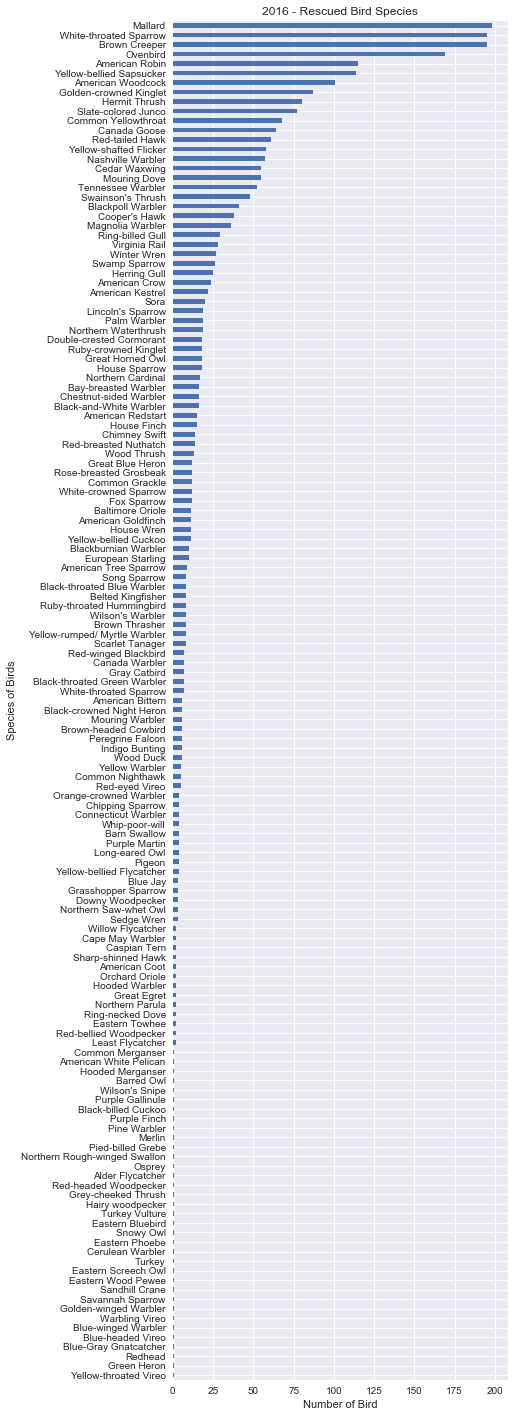

In [31]:
fig, ax = plt.subplots(figsize=(6, 25))
bird_data['Chart Number'].groupby(bird_data["Bird Species"]).count().sort_values(ascending = True).plot(kind="barh")

ax.set_xlabel('Number of Bird')
ax.set_ylabel('Species of Birds')
plt.title('2016 - Rescued Bird Species')
plt.show()

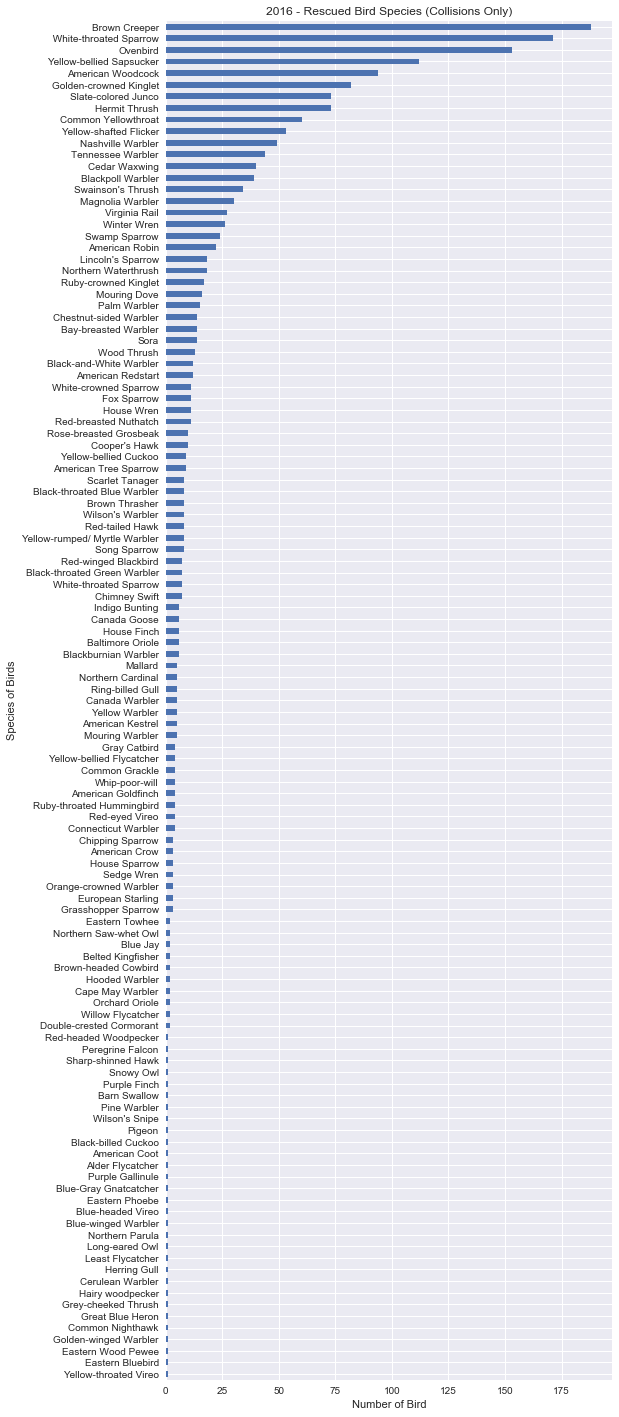

In [32]:
fig, ax = plt.subplots(figsize=(8, 25))
collision_values = ["Collision - building", "Collision - window", "Collision - car", "Collision - other"]
row_mask = bird_data.isin(collision_values)["Injury Cause"]
collision_data = bird_data[row_mask]

collision_data['Chart Number'].groupby(collision_data["Bird Species"]).count().sort_values(ascending = True).plot(kind="barh")

ax.set_xlabel('Number of Bird')
ax.set_ylabel('Species of Birds')
plt.title('2016 - Rescued Bird Species (Collisions Only)')
plt.show()

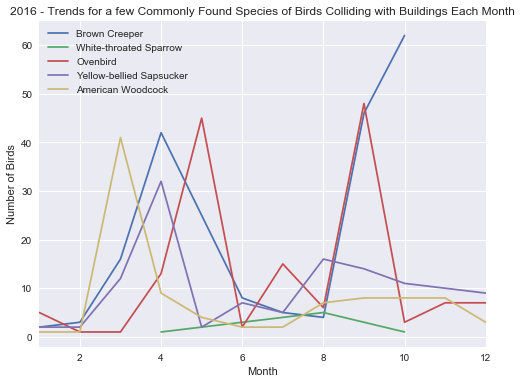

In [33]:
fig, ax = plt.subplots(figsize=(8, 6))

collision_values = ["Collision - building", "Collision - window", "Collision - car", "Collision - other"]
collision_mask = bird_data.isin(collision_values)["Injury Cause"]
collision_data = bird_data[collision_mask]

# common_species = ["White-throated Sparrow"]
common_species = ["Brown Creeper", "White-throated Sparrow", "Ovenbird", "Yellow-bellied Sapsucker", "American Woodcock"]
for species in common_species:
    species_data = collision_data[collision_data.isin([species])["Bird Species"]]
    species_data['Chart Number'].groupby(species_data["Admission Date"].dt.month).count().plot(kind="line")
    species_data



ax.set_xlabel('Month')
ax.set_ylabel('Number of Birds')
plt.legend(common_species, loc='best')

plt.title('2016 - Trends for a few Commonly Found Species of Birds Colliding with Buildings Each Month')
plt.show()

# Interesting to notice that Woodcocks didn't have much of an Autumn peak. 
# Do they follow a different migratory route back north? As I would expect,
# their migratory peak occurs a month before any others, although I wish 
# the data granularity was better.

# Not sure why the White-throated Sparrows display incorrectly. (Brown
# Creepers had no rescues in Nov, Dec.)

In [34]:
mallard = ["Mallard"]
mallard_data = bird_data[bird_data.isin([species])["Bird Species"]]
mallard_data["Injury Cause"].value_counts()
# This makes me think a lot of my visualizations might be wrong - 
# above code made me think the mallards were not collision victims.

Collision - building    93
Unknown                  7
Collision - window       1
Name: Injury Cause, dtype: int64

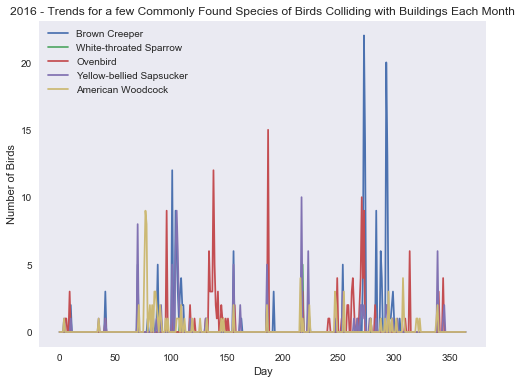

In [105]:
pd.options.mode.chained_assignment = None;

collision_values = ["Collision - building", "Collision - window", "Collision - car", "Collision - other"]
collision_mask = bird_data.isin(collision_values)["Injury Cause"]
collision_data = bird_data[collision_mask]

common_species = ["Brown Creeper", "White-throated Sparrow", "Ovenbird", "Yellow-bellied Sapsucker", "American Woodcock"]
daily_counts = pd.DataFrame(data = {'day': list(range(365))})

x = 0;
for species in common_species:
    daily_counts[species] = np.zeros(365)
    species_data = collision_data[collision_data.isin([species])["Bird Species"]]
    species_counts = species_data['Chart Number'].groupby(species_data["Admission Date"].dt.dayofyear).count()
    x = species_data
    for day, c in species_counts.iteritems():
        daily_counts[species][day] = c

fig, ax = plt.subplots(figsize=(8, 6))

for species in common_species:
    ax.plot(daily_counts['day'], daily_counts[species])

ax.set(xlabel='Day', 
       ylabel='Number of Birds',
       title='2016 - Trends for a few Commonly Found Species of Birds Colliding with Buildings Each Month')

plt.legend(common_species, loc='best')

ax.grid()

plt.show()